In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pandas.plotting import table 
from scipy.stats import linregress
from scipy.stats import describe
from sklearn import datasets
import statsmodels.api as sm
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [141]:
file = "../data/us_births_2016_2021.csv"


In [142]:
df = pd.read_csv(file)


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          5496 non-null   object 
 1   State Abbreviation             5496 non-null   object 
 2   Year                           5496 non-null   int64  
 3   Gender                         5496 non-null   object 
 4   Education Level of Mother      5496 non-null   object 
 5   Education Level Code           5496 non-null   int64  
 6   Number of Births               5496 non-null   int64  
 7   Average Age of Mother (years)  5496 non-null   float64
 8   Average Birth Weight (g)       5496 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 386.6+ KB


In [144]:
# Rename columns to eliminate spaces
df = df.rename(columns = {'State Abbreviation':'State_Abbreviation', 'Education Level of Mother':'Education_Level_of_Mother', 
                     'Education Level Code':'Education_Level_Code', 'Number of Births':'Number_of_Births', 'Average Age of Mother (years)':'Average_Age_of_Mother_(years)',
                    'Average Birth Weight (g)':'Average_Birth_Weight_(g)'})
df

,State,State_Abbreviation,Year,Gender,Education_Level_of_Mother,Education_Level_Code,Number_of_Births,Average_Age_of_Mother_(years),Average_Birth_Weight_(g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3
...,...,...,...,...,...,...,...,...,...
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0


In [145]:
# Identifying the different sorts of null values
missing_value = ["N/a", "na", "n/a", "n/A", np.nan]
df = pd.read_csv(file, na_values = missing_value)

<AxesSubplot:>

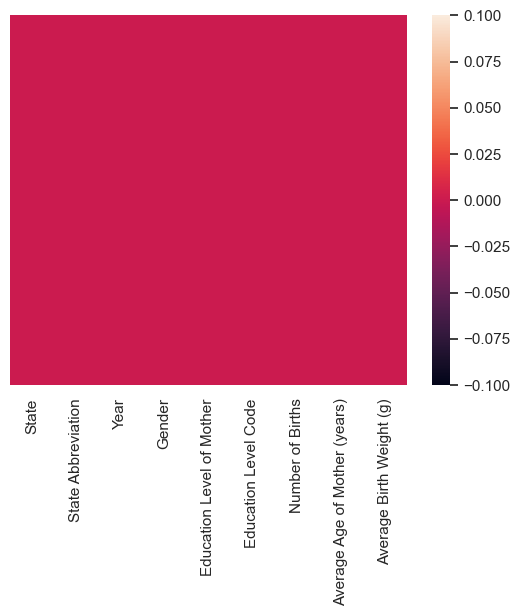

In [146]:
# Plot a heat map showing the null values
sns.heatmap(df.isnull(), yticklabels=False)

In [147]:
# Remove null values
df = df.dropna()

In [148]:
# Plot a heat map verifying the null values are removed
##sns.heatmap(df.isnull(), yticklabels=False)

In [149]:
# Rename columns to eliminate spaces
df = df.rename(columns = {'State Abbreviation':'State_Abbreviation', 'Education Level of Mother':'Education_Level_of_Mother', 
                     'Education Level Code':'Education_Level_Code', 'Number of Births':'Number_of_Births', 'Average Age of Mother (years)':'Average_Age_of_Mother_(years)',
                    'Average Birth Weight (g)':'Average_Birth_Weight_(g)'})
df

,State,State_Abbreviation,Year,Gender,Education_Level_of_Mother,Education_Level_Code,Number_of_Births,Average_Age_of_Mother_(years),Average_Birth_Weight_(g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3
...,...,...,...,...,...,...,...,...,...
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0


In [150]:
# Display the dataframe only containing the following selected states of interest 
# CA, TX, DC, NC, AK, FL, HI, NY
selected_df = df[(df.State_Abbreviation == 'CA') | (df.State_Abbreviation == 'TX') 
                 | (df.State_Abbreviation == 'DC') | (df.State_Abbreviation == 'NC') | (df.State_Abbreviation == 'AK') 
                 | (df.State_Abbreviation == 'FL') | (df.State_Abbreviation == 'HI') | (df.State_Abbreviation == 'NY')]

selected_df

,State,State_Abbreviation,Year,Gender,Education_Level_of_Mother,Education_Level_Code,Number_of_Births,Average_Age_of_Mother_(years),Average_Birth_Weight_(g)
108,Alaska,AK,2016,F,8th grade or less,1,32,28.2,3396.0
109,Alaska,AK,2016,F,9th through 12th grade with no diploma,2,491,24.5,3288.1
110,Alaska,AK,2016,F,High school graduate or GED completed,3,1603,26.2,3321.2
111,Alaska,AK,2016,F,"Some college credit, but not a degree",4,1442,27.8,3369.0
112,Alaska,AK,2016,F,"Associate degree (AA, AS)",5,438,29.7,3370.3
...,...,...,...,...,...,...,...,...,...
4735,Texas,TX,2021,M,"Associate degree (AA, AS)",5,13549,29.6,3289.5
4736,Texas,TX,2021,M,"Bachelor's degree (BA, AB, BS)",6,38187,31.3,3336.6
4737,Texas,TX,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,14899,33.0,3319.3
4738,Texas,TX,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,4277,34.0,3305.4


In [151]:
import sqlite3

# Create a new SQLite database 
# conn = sqlite3.connect('USbirths.sqlite')
conn = sqlite3.connect('us_births.sqlite')


# Write the data to a SQLite table name 'births'
selected_df.to_sql('births', conn, if_exists='replace', index=False)

864